In [1]:
# %% [markdown]
# # Financial Complaints EDA Notebook
# **Objective:** Analyze patterns in consumer financial complaints

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px 

sns.set_palette("husl")

In [2]:
# %%
# Load and prepare data
df = pd.read_csv('../data/preprocessed/filtered_complaints.csv')
df['date'] = pd.to_datetime(df['Date received'])
df['text_length'] = df['cleaned_narrative'].str.len()
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

In [3]:
# Add sentiment analysis
df['sentiment'] = df['cleaned_narrative'].apply(lambda x: TextBlob(x).sentiment.polarity)

# %% [markdown]
# ## 1. Complaint Volume Analysis

# %%
# Temporal trends
fig = px.line(df.resample('ME', on='date').size().reset_index(name='count'),
              x='date', y='count',
              title='Monthly Complaint Volume Trend',
              labels={'count':'Number of Complaints'})
fig.show()

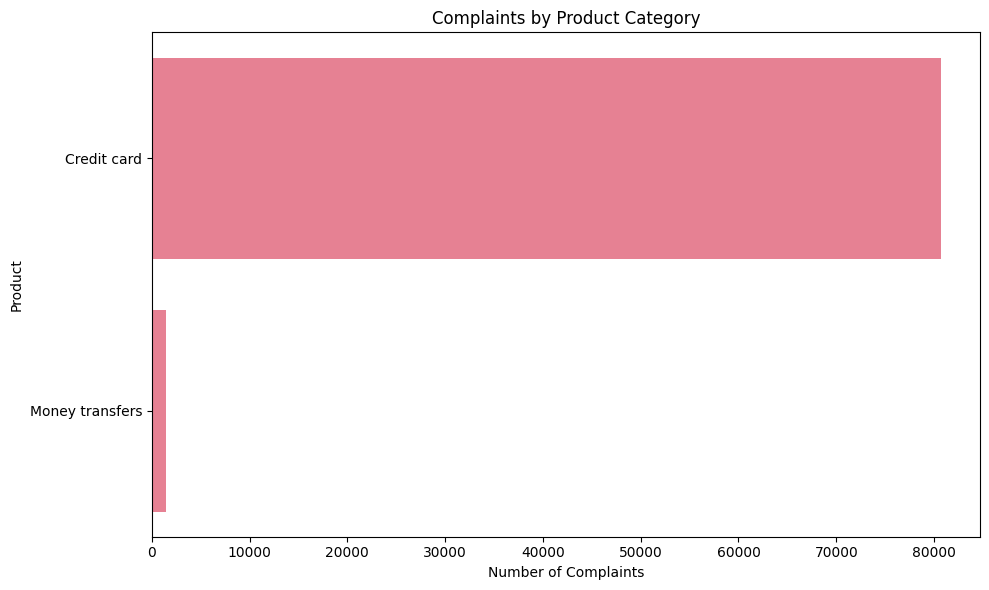

In [4]:
# %%
# Product distribution
plt.figure(figsize=(10,6))
prod_dist = df['Product'].value_counts()
sns.barplot(x=prod_dist.values, y=prod_dist.index)
plt.title('Complaints by Product Category')
plt.xlabel('Number of Complaints')
plt.tight_layout()
plt.savefig('../visualizations/product_dist.png')

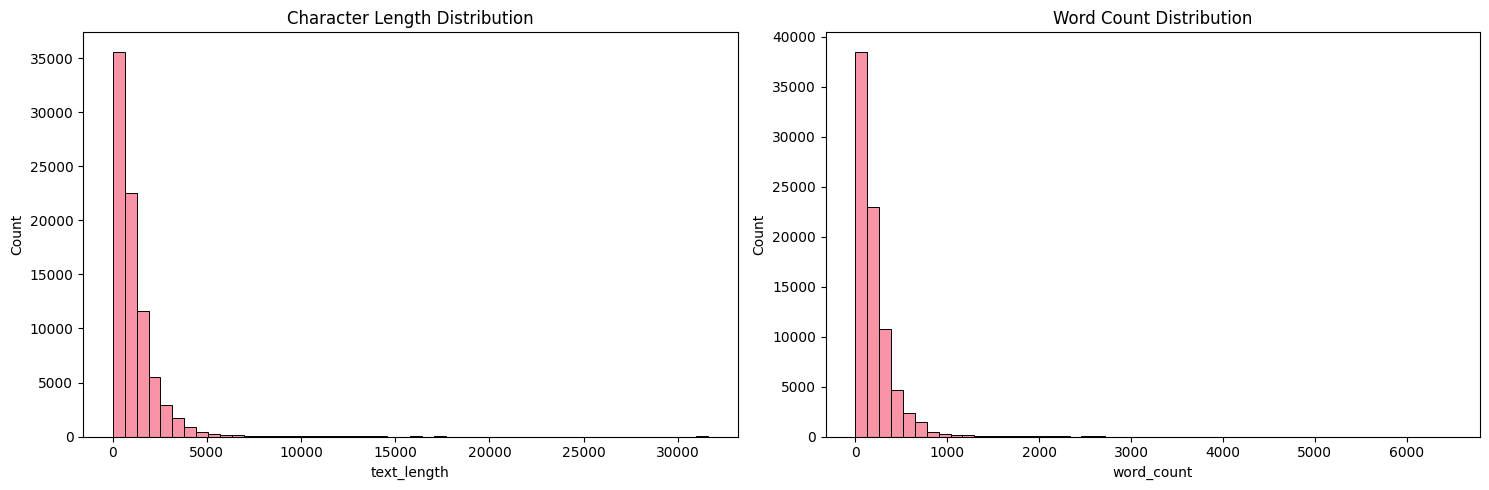

In [5]:
# %% [markdown]
# ## 2. Text Analysis

# %%
# Text length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['text_length'], bins=50, ax=ax1)
ax1.set_title('Character Length Distribution')
sns.histplot(df['word_count'], bins=50, ax=ax2)
ax2.set_title('Word Count Distribution')
plt.tight_layout()

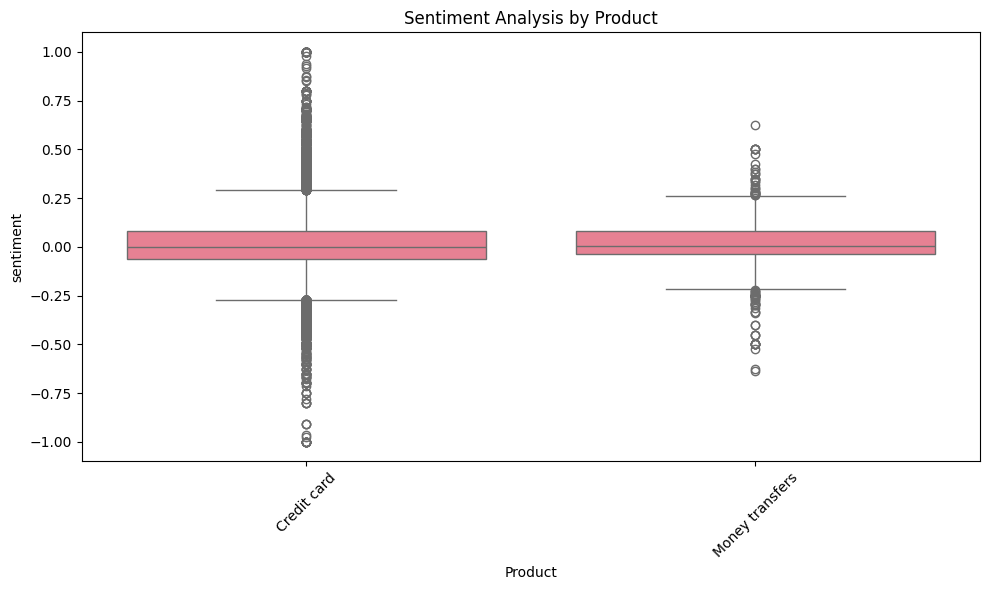

In [6]:
# %%
# Sentiment analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='Product', y='sentiment', data=df)
plt.xticks(rotation=45)
plt.title('Sentiment Analysis by Product')
plt.tight_layout()

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

def plot_wordcloud(text, title):
    # Ensure the visualizations folder exists
    output_dir = '../visualizations'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    wordcloud = WordCloud(width=800, 
                          height=400,
                          background_color='white',
                          colormap='viridis').generate(text)
                          
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title, size=15)
    plt.axis('off')
    plt.tight_layout()
    
    # Save the plot to the specified path
    file_path = os.path.join(output_dir, f'{title.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    print(f"Plot saved to: {file_path}")
    
    # Display the plot in the notebook
    plt.show()

# Example usage (assuming 'all_narratives' is a string of text)
# plot_wordcloud(all_narratives, 'Most Frequent Complaint Terms')

Plot saved to: ../visualizations\most_common_terms_in_all_complaints.png


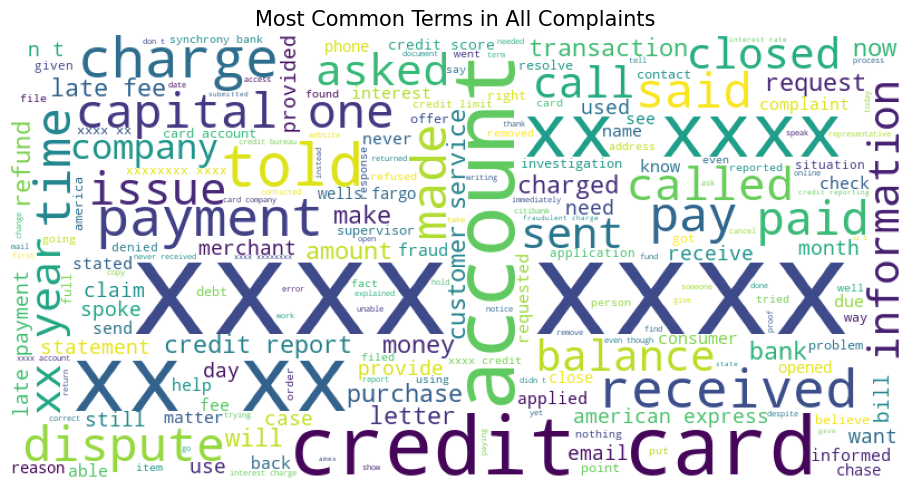

Plot saved to: ../visualizations\common_terms_Credit_card.png


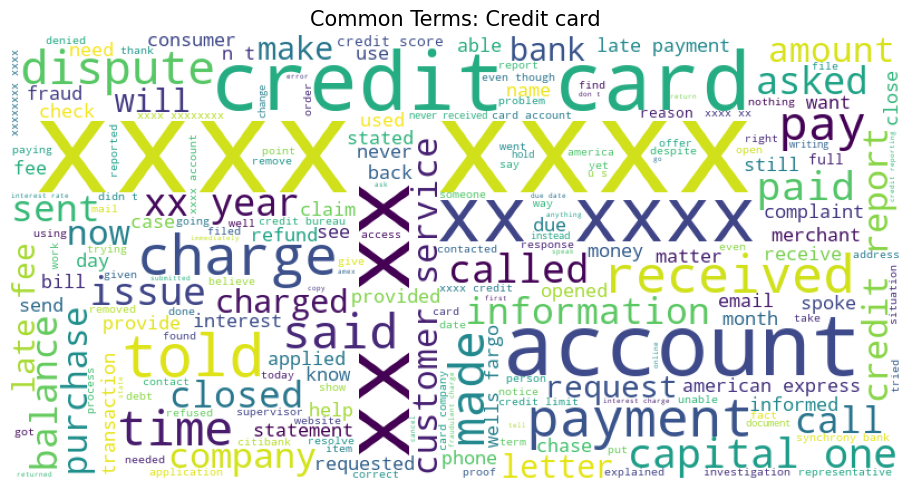

Plot saved to: ../visualizations\common_terms_Money_transfers.png


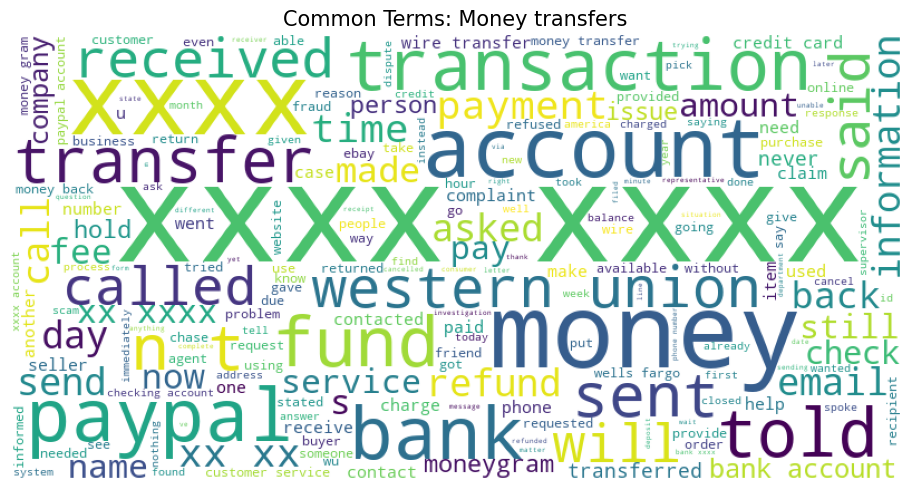

In [9]:
# %%
# Overall word cloud
plot_wordcloud(' '.join(df['cleaned_narrative']), 'Most Common Terms in All Complaints')

# %%
# Product-specific word clouds
for product in df['Product'].unique():
    # Sanitize the product name to be used as a filename
    safe_product_name = product.replace(':', '').replace('/', '').replace('\\', '').replace(' ', '_')
    
    product_text = ' '.join(df[df['Product'] == product]['cleaned_narrative'])
    
    # Use the sanitized name for the filename, but keep the original for the title
    title = f'Common Terms: {product}'
    filename = f'common_terms_{safe_product_name}.png'
    
    # You'll need to update your plot_wordcloud function to accept a filename argument.
    # Here's an example of how that function should look:
    
    def plot_wordcloud(text, title, filename):
        # Create the visualizations folder if it doesn't exist
        output_dir = '../visualizations'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"Created directory: {output_dir}")

        wordcloud = WordCloud(width=800,
                             height=400,
                             background_color='white',
                             colormap='viridis').generate(text)
                             
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud)
        plt.title(title, size=15)
        plt.axis('off')
        plt.tight_layout()
        
        # Save the plot with the sanitized filename
        file_path = os.path.join(output_dir, filename)
        plt.savefig(file_path)
        print(f"Plot saved to: {file_path}")
        
        # Display the plot in the notebook
        plt.show()

    # Then call the function like this:
    plot_wordcloud(product_text, title, filename)

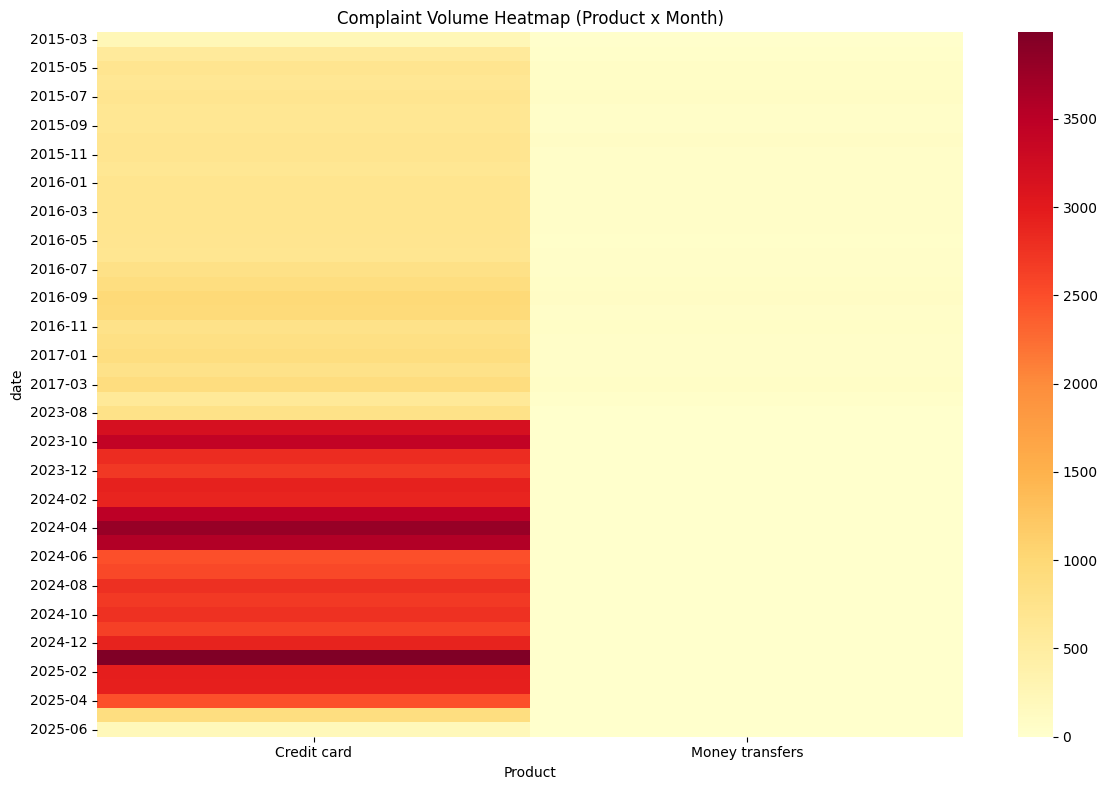

In [10]:
# %%
# Complaint heatmap by product/month
heatmap_data = df.groupby([df['date'].dt.to_period('M'), 'Product']).size().unstack()
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data.fillna(0), cmap='YlOrRd')
plt.title('Complaint Volume Heatmap (Product x Month)')
plt.tight_layout()
plt.savefig('../visualizations/heatmap.png')

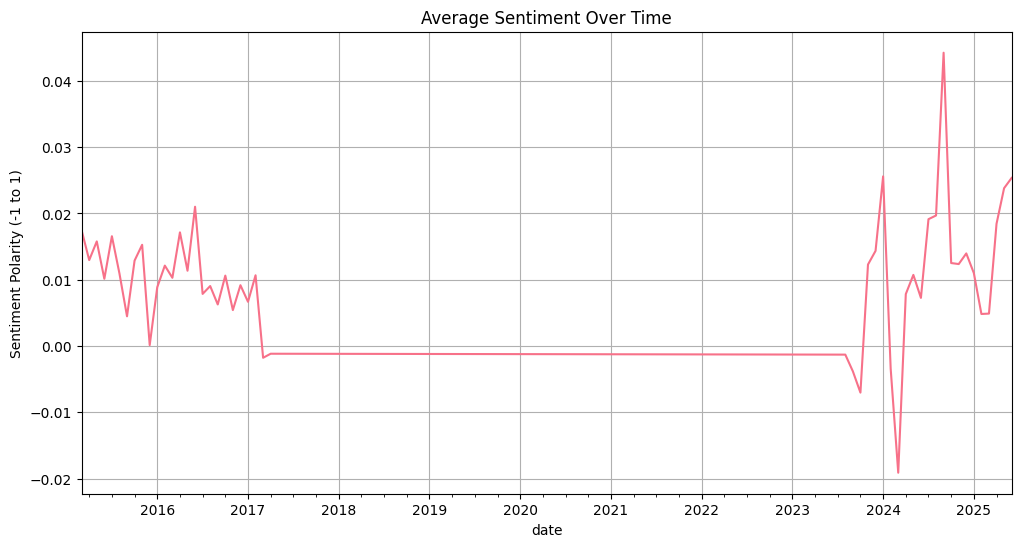

In [11]:
# Sentiment over time
sentiment_ts = df.groupby(df['date'].dt.to_period('M'))['sentiment'].mean()
sentiment_ts.plot(figsize=(12,6), title='Average Sentiment Over Time')
plt.ylabel('Sentiment Polarity (-1 to 1)')
plt.grid(True)